In [40]:
import numpy as np
import pandas as pd
df = pd.read_csv("../data/按日期单品合并.csv",encoding='utf-8',index_col='销售日期')
pl = pd.read_excel("../data/附件1.xlsx")
pl['单品编码'] = pl['单品编码'].astype(str)
pl = pl.set_index('单品编码')
print(pl)
df['Sum'] = df.apply(lambda row: row.sum(), axis=1)

                       单品名称        分类编码 分类名称
单品编码                                        
102900005115168        牛首生菜  1011010101  花叶类
102900005115199       四川红香椿  1011010101  花叶类
102900005115625      本地小毛白菜  1011010101  花叶类
102900005115748         白菜苔  1011010101  花叶类
102900005115762          苋菜  1011010101  花叶类
...                     ...         ...  ...
106958851400125   海鲜菇(袋)(4)  1011010801  食用菌
106971533450003      海鲜菇(包)  1011010801  食用菌
106971533455008   海鲜菇(袋)(3)  1011010801  食用菌
106973223300667   虫草花(盒)(2)  1011010801  食用菌
106973990980123  和丰阳光海鲜菇(包)  1011010801  食用菌

[251 rows x 3 columns]


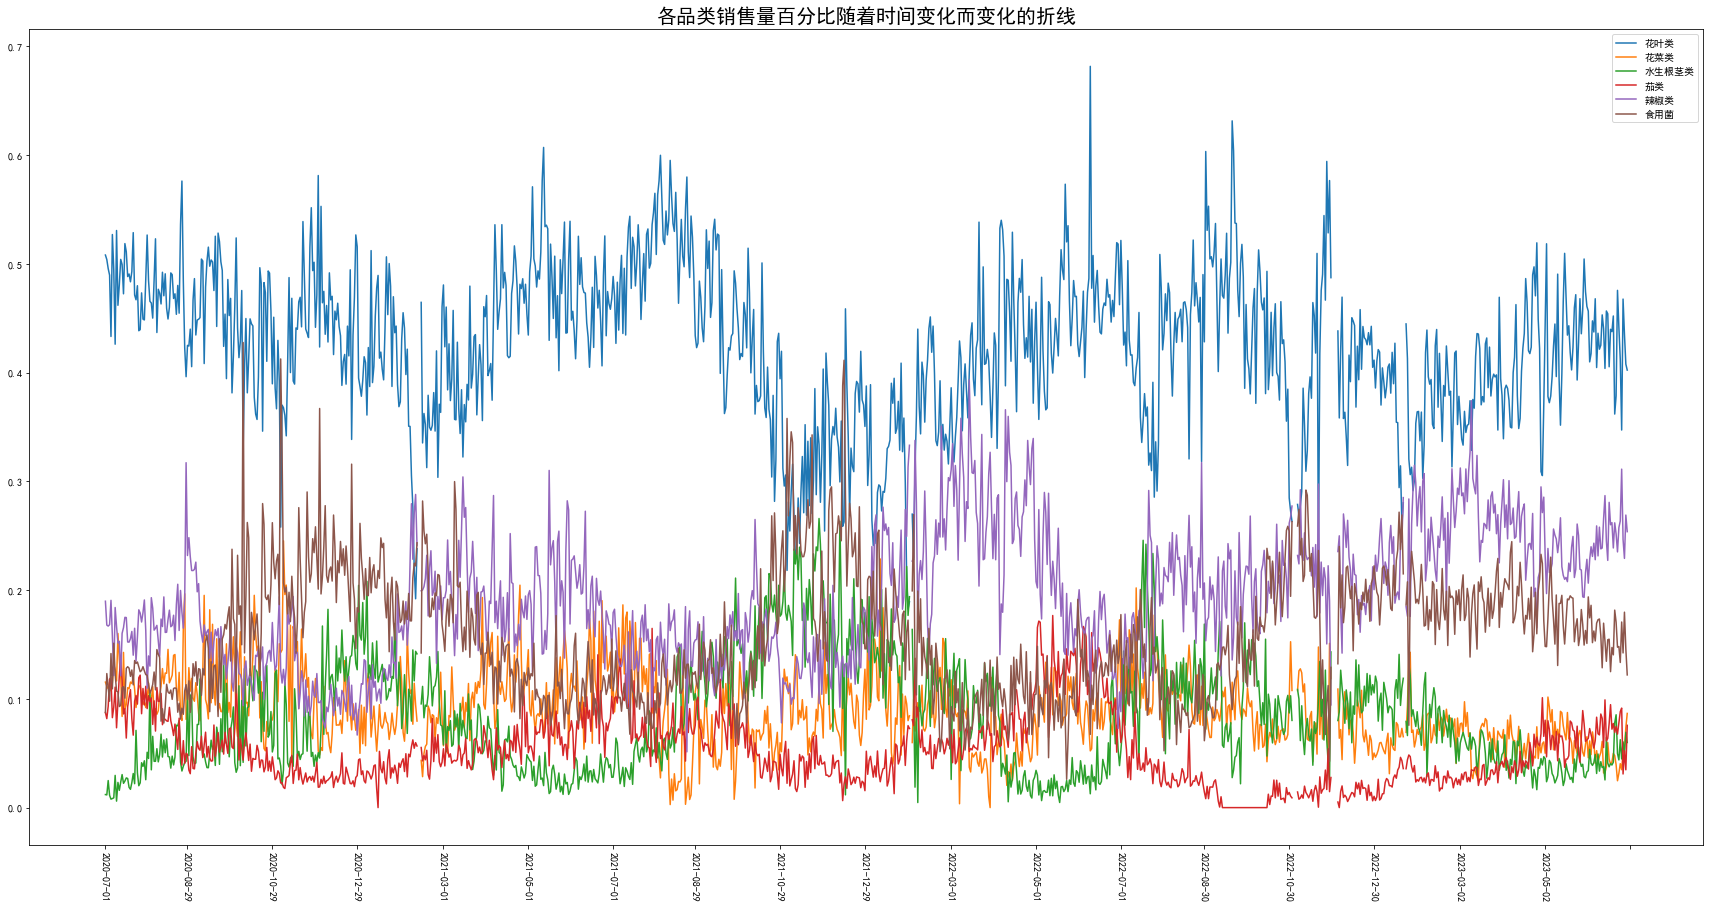

In [41]:
df_sum = []
df_types_sum = pd.DataFrame([])
df_types_sum['销售日期']=pd.date_range(start='2020-07-01', end='2023-06-30', freq='D')
df_types_sum = df_types_sum.set_index('销售日期')
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
fig= plt.figure(figsize=(30,15))
plt.xticks(rotation=270, fontsize= 10)
import matplotlib.dates as mdates
ax=plt.gca()
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.title('各品类销售量百分比随着时间变化而变化的折线',fontsize = 20)
for types in ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']:
    names = pd.read_excel("../data/Kmeans/representative/"+types+'.xlsx', header=None)
    temp = pd.DataFrame([])
    for index in df:
        if index == 'Sum':
            break;
        plrow = pl.loc[index]
        if plrow['分类名称'] == types:
            name_CN = plrow['单品名称']
            temp[name_CN] = df[index]
    temp['Sum'] = temp.apply(lambda row: row.sum(), axis=1)
    #print(temp)
    df_sum.append(temp['Sum'].sum())
    df_types_sum[types] = temp['Sum'].values
    Category_proportion = temp['Sum']/df['Sum']
    #print(Category_proportion)
    plt.plot(Category_proportion, label=types)
plt.legend()  # 生成图例
plt.savefig('../data/linecharts/TypesInAll/'+'各品类销售量百分比随着时间变化而变化的折线.jpg')
plt.show()

In [42]:
print(df_sum)
df_types_sum.to_csv('../data/销售量按日期品类合并.csv',sep=',',encoding='utf_8_sig')

[198520.978, 41766.451, 40581.353, 22431.782, 91588.62900000002, 76086.725]


              Sum
花叶类    198520.978
花菜类     41766.451
水生根茎类   40581.353
茄类      22431.782
辣椒类     91588.629
食用菌     76086.725


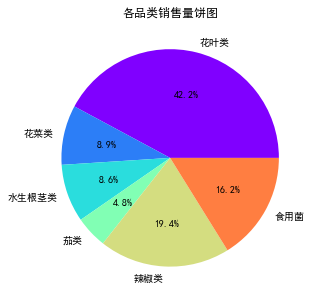

In [43]:
df_sum = pd.DataFrame(data = df_sum, index =  ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌'] , columns=['Sum'])
print(df_sum)
import matplotlib.pyplot as plt
from  matplotlib import cm
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
fig = plt.figure(figsize=(5,5))
# 数据
labels = ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']
sizes = df_sum['Sum']
colors = cm.rainbow(np.arange(len(sizes))/len(sizes)) # colormaps: Paired, autumn, rainbow, gray,spring,Darks patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.0f%%',shadow=False, startangle=170, colors=colors)
# 绘制饼图
plt.pie(sizes, labels=labels, colors = colors, autopct='%1.1f%%')
# 设置图表标题
plt.title('各品类销售量饼图')
plt.savefig('../data/piecharts/'+'各品类销售量饼图.jpg')
# 显示图表
plt.show()